# Loan Prediction Analysis

This is standard supervised classification task where we have to predict whether loan would be approved or not.

# Import modules

In [1]:
#imort necessary libraries
#import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#warning handle
warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
# Reading the training dataset in a dataframe using Pandas

df= pd.read_csv(r"C:\Users\anuja\Desktop\Project work\loan\train.csv")
df.head(n=10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

In [4]:
df.shape #shape of training dataset

(614, 13)

In [5]:
#summary statistics
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
#column information
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations:- We can see there are total 13 columns including target variable, all of them are self explanatory. We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

# Data Preprocessing

In [7]:
#missing values in decsending order
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [8]:
#fill the missing for numerical terms - mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
#fill the missing for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum() #to verify null values are not there

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

Finding : Here, we find that we used mean to replace numerical columns missing values and we used mode to replace categorical column missing values.

# Exploratory Data Analysis

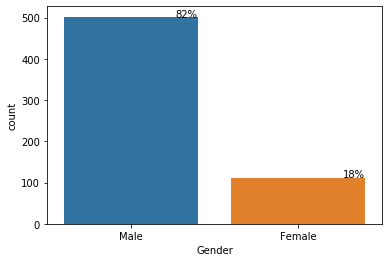

In [12]:
#Analysis of gender column
total = float(len(df))
ax=sns.countplot(df['Gender'])
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This Bar graph shows that, Major of applicants are male i.e 82% and only 18% of applicants are female

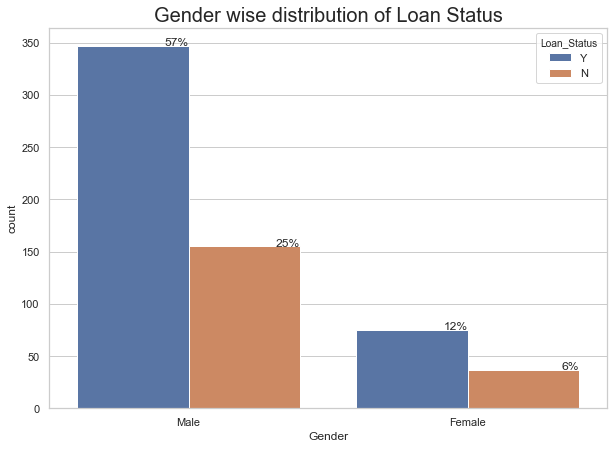

In [13]:
#this is gender wise distribution of loan status
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="Gender", hue="Loan_Status", data=df)
plt.title('Gender wise distribution of Loan Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that gender wise distribution of loan status is in male 57% loan are approved and  25% are rejected. In female 12% loan are approved and 6% are loan rejected.

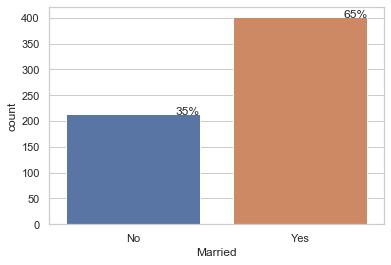

In [14]:
#Analysis of Married column
ax=sns.countplot(df['Married'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that married applicants are more i.e. 65% and non married applicants are less i.e.35%.

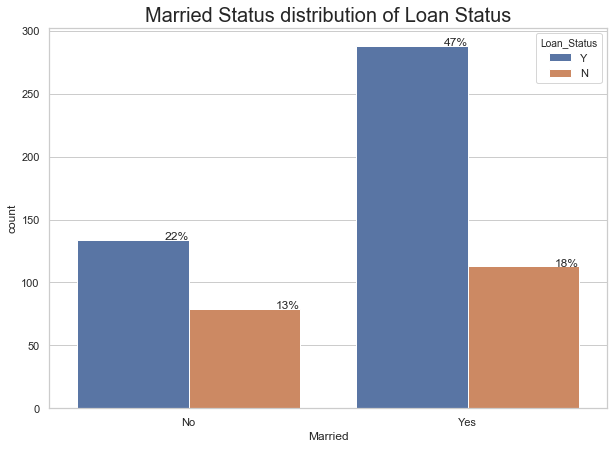

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="Married", hue="Loan_Status", data=df)
plt.title('Married Status distribution of Loan Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that, In married category 47% applicants loan are approved and 18% applicant loan are rejected. In non-married category 22% applicants loan are approved and 13% applicants loan are rejected.

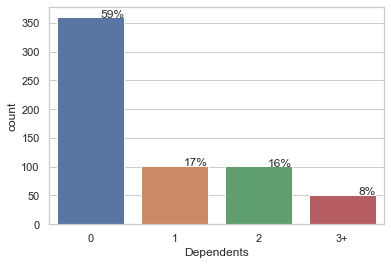

In [16]:
#Analysis of Dependents column
ax=sns.countplot(df['Dependents'])
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that 59% applicants don't have any dependents. 17% applicants have 1 dependent ,16% applicatnts have 2 dependents and only 8% applicants have more than 3 dependents.

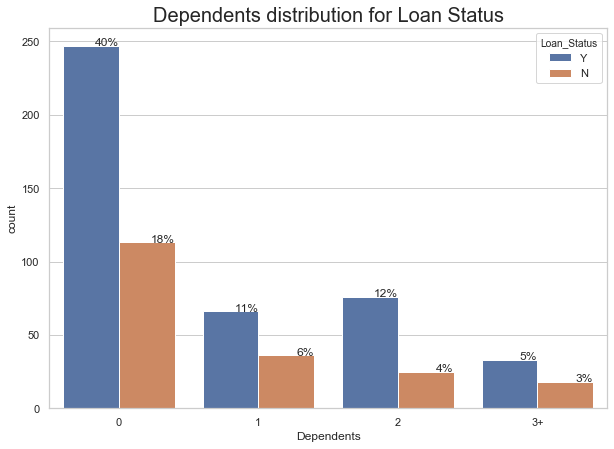

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="Dependents", hue="Loan_Status", data=df)
plt.title('Dependents distribution for Loan Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

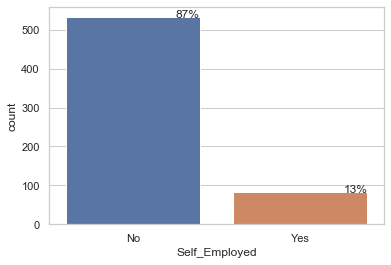

In [18]:
#Analysis of SelfEmployeed column
ax=sns.countplot(df['Self_Employed'])
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that, Most of the people are working i.e 87% and rest of that self-Employeed

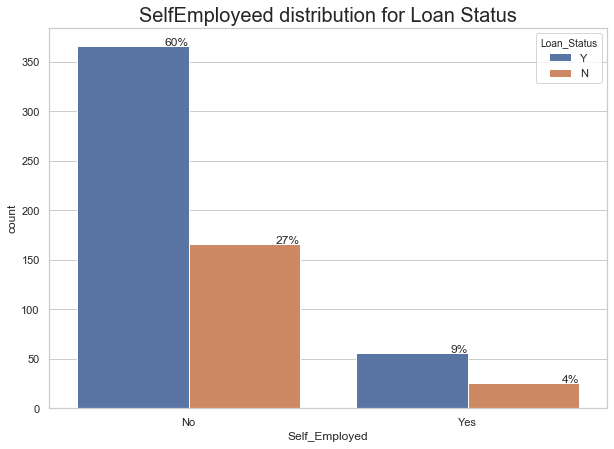

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df)
plt.title('SelfEmployeed distribution for Loan Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

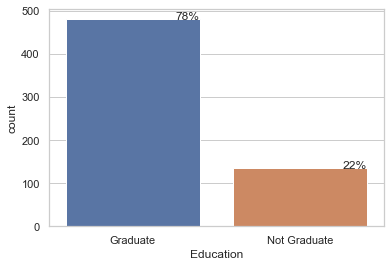

In [20]:
#Analysis of Education column
ax=sns.countplot(df['Education'])
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that, Graduate applicants are more i.e 78% and Not Graduate applicants are less i.e 22%

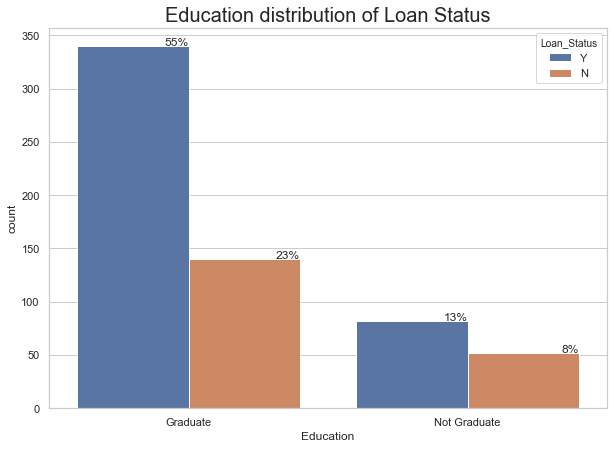

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="Education", hue="Loan_Status", data=df)
plt.title('Education distribution of Loan Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

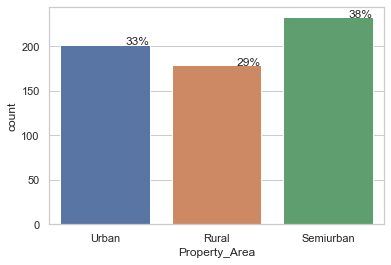

In [22]:
#Analysis of PropertyArea column
ax=sns.countplot(df['Property_Area'])
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that most of the applicants are from semiurban area i.e.38% .there are aprox 200 applicants i.e. 33% comes from urban area. And rest 29% applicants comes from rural area.

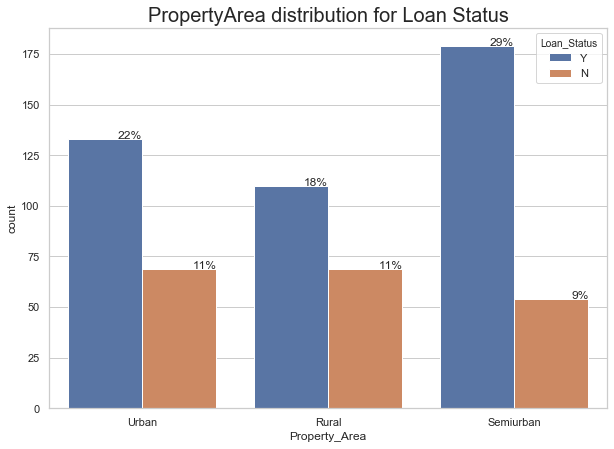

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
total = float(len(df))
ax = sns.countplot(x="Property_Area", hue="Loan_Status", data=df)
plt.title('PropertyArea distribution for Loan Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

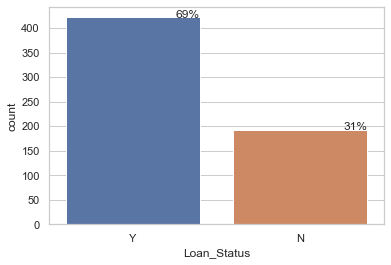

In [24]:
#Analysis of LoanStatus column
ax=sns.countplot(df['Loan_Status'])
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

This graph shows that, 69% applicant's loan are approved and 31% applicant's loan are rejected.

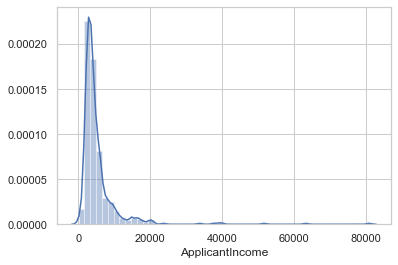

In [25]:
#Analysis of ApplicantIncome column
sns.distplot(df['ApplicantIncome'])

This distribution shows that, Majority of applicants income in the range of 0-10000, only few of them around 40000 and 80000, and we see that graph is left-skwed so that,we applied log function to column to normalize the attribute in bell-shaped curve.

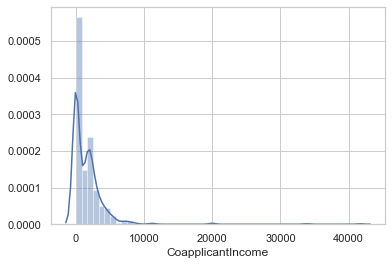

In [26]:
#Analysis of CoApplicantIncome column
sns.distplot(df["CoapplicantIncome"])

This distribution shows that, Majority of applicants in the range of 0-7000, and few of them are in the range of 20000

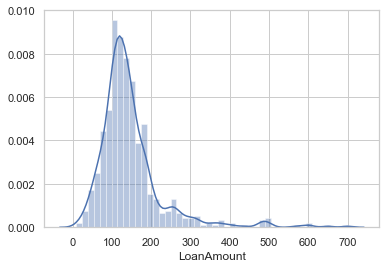

In [27]:
#Analysis of LoanAmount column
sns.distplot(df["LoanAmount"])

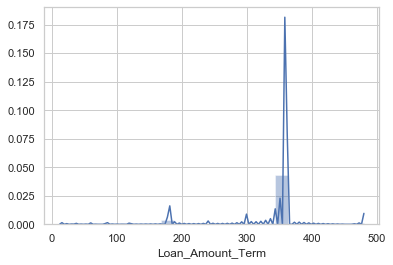

In [28]:
#Analysis of LoanAmountTerm column
#sns.distplot(df["Loan_Amount_Term"])
sns.distplot(df["Loan_Amount_Term"], hist = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 0.1})

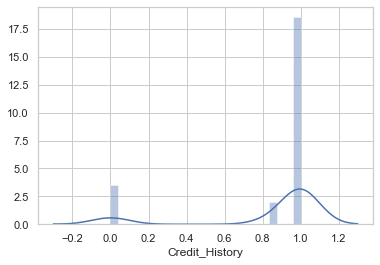

In [29]:
#Analysis of CreditHistory column
#sns.distplot(df['Credit_History'])
sns.distplot(df['Credit_History'], hist = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 0.1})

In [30]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  
0             1.0         Urban           Y        5849.0  
1             1.0         Rural           N        6091.0  
2             1.0         Urban           Y        3000.0  
3             1.0         Urban           Y        4941.0  
4             1.0         Urban           Y        6000.0

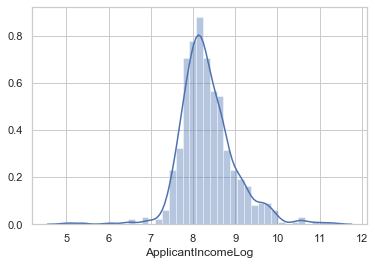

In [31]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

In [32]:
df.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  ApplicantIncomeLog  
0             1.0         Urban           Y        5849.0            8.674026  
1             1.0         Rural           N        6091.0            8.430109  
2             1.0         Urban           Y        3000.0            8.006368  
3             1.0         Urban           Y        4941.0            7.856707  
4             1.0         Urban           Y        6000.0            8.699515

In [33]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])

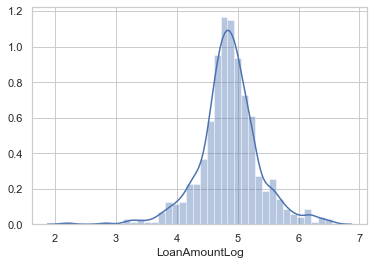

In [34]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

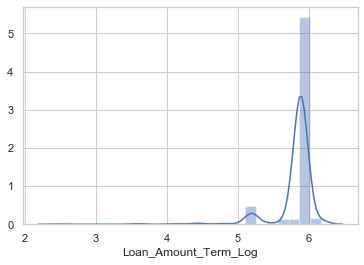

In [35]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
#sns.distplot(df["Loan_Amount_Term_Log"])
sns.distplot(df["Loan_Amount_Term_Log"], hist = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 0.1})

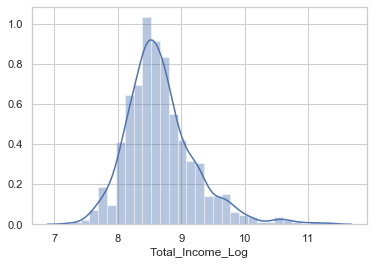

In [36]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

# Correlation Matrix

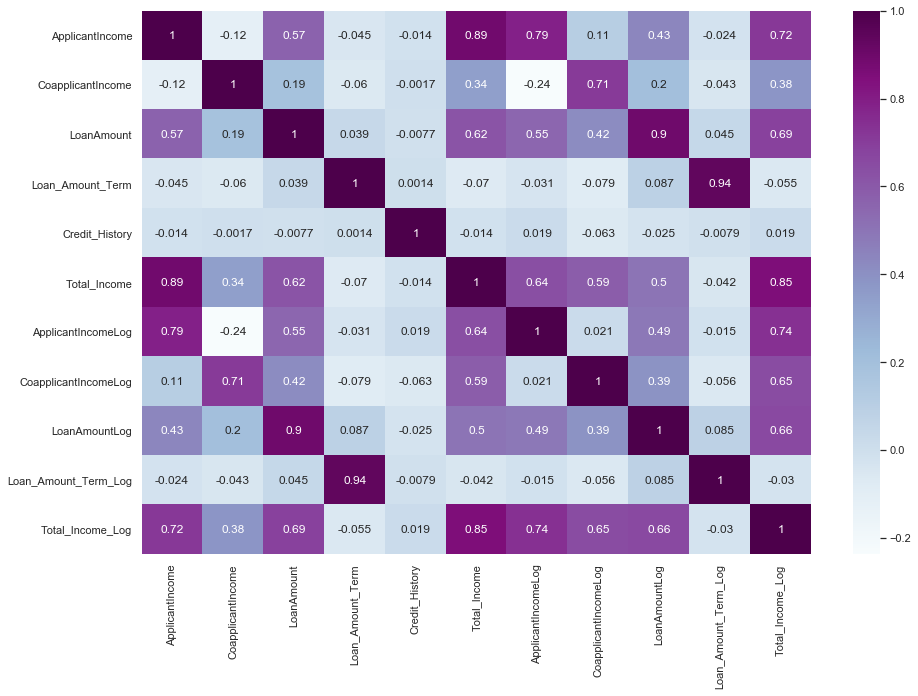

In [37]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

This correlation matrix shows that, High density i.e. 1 represented by dark colour and low density i.e.-0.2 is reprented by light colour. also we can say that Loan_Amount and ApplicantIncome have strong correlation.

In [38]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  ApplicantIncomeLog  \
0             1.0         Urban           Y        5849.0            8.674026   
1             1.0         Rural           N        6091.0            8.430109   
2             1.0         Urban           Y        3000.0            8.006368   
3             1.0         Urban           Y        4941.0            7.856707   
4             1.0         Urban           Y        6000.0            8.699515   

   CoapplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  Total_Income_Log  
0                  -inf       4.986426              5.886104          8.674026  
1              7.318540       4.852030              5.886104          8.714568  
2                  -inf       4.189655              5.886104          8.006368  
3              7.765569       4.787492              5.886104          8.505323  
4                  -inf       4.948760              5.886104          8.699515

In [39]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0         Urban           Y            8.674026       4.986426   
1         Rural           N            8.430109       4.852030   
2         Urban           Y            8.006368       4.189655   
3         Urban           Y            7.856707       4.787492   
4         Urban           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

# Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

we need to make this data ready for the model. And to convert this kind of categorical text data into model-understandable numerical data, Therefore,we used the Label Encoder class.

In [41]:
df.head() 

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              2            1            8.674026       4.986426   
1              0            0            8.430109       4.852030   
2              2            1            8.006368       4.189655   
3              2            1            7.856707       4.787492   
4              2            1            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

# Train-Test Split

In [42]:
# specify input and output attributes
feature_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History','Property_Area','ApplicantIncomeLog','LoanAmountLog','Loan_Amount_Term_Log','Total_Income_Log']
X = df.drop(columns=['Loan_Status','Dependents','Education','Self_Employed','Property_Area','Total_Income_Log','Loan_Amount_Term_Log'], axis=1)
y = df['Loan_Status']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

# Model Training of Decision Tree Classifier

In [44]:
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [48]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 3}
Best score is 0.7964547514327603


# Random Forest Classifier

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [50]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


# SVM

In [51]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


# LogisticRegression

In [53]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

Predict the labels of the test set

In [54]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 21,  29],
       [  2, 102]], dtype=int64)

In [55]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

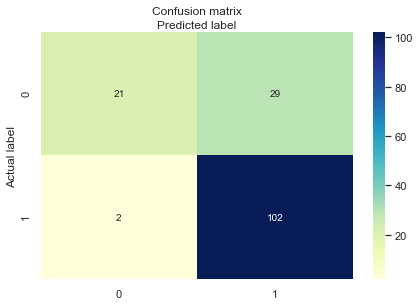

In [56]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7987012987012987
Precision: 0.7786259541984732
Recall: 0.9807692307692307


# ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

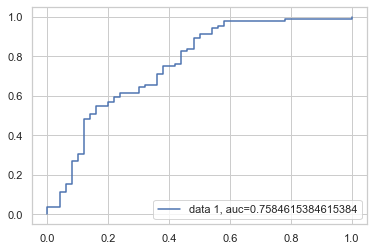

In [58]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.75. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [59]:
print("Predicted values :",y_pred)

Predicted values : [1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1]


In [60]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
#print("y_test :",y_test)
#np.array(y_test)
print("Actual values:",np.array(y_test))

Actual values: [1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1]


In [61]:
Applicants_info = [0,1,1,8.761026,5.9866]

In [62]:
applicant_info=np.array([Applicants_info])
applicant_info

array([[0.      , 1.      , 1.      , 8.761026, 5.9866  ]])

In [63]:
logreg.predict(applicant_info)

array([1])

In [64]:
# Necessary imports 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.8111022257763562


# To Save model and load model 

In [65]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(logreg_cv, pickle_out) 
pickle_out.close()

Here by using LogisticRegression model we got accuracy is 81% 

# Conclusion: 

     Finally, in our model by using logistic regression model with 81% accuracy we predict whether the loan is approved or not. In order to implement this various input variables were used to get the output. Whenever program takes the input data it gives the output in the form of binary i.e.,either 0 or 1. If the output is 1 then ‘Your Loan is Approved’ will be displayed and it indicates that loan is approved.If the output is 0 then ‘Your Loan is Rejected’ will be displayed and it indicates that loan is not approved.
    
    Here, we had implemented loan credibility prediction system that helps the organizations in making the right decision to approve or reject the loan request of the customers. This will definitely help the banking industry to open up efficient delivery channels. In this model,Logistic Regression algorithm is used for the prediction. Incorporation of other techniques that outperform the performance of popular data mining models has to be implemented and tested for the domain.